In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Choisir le match

In [76]:
# rep="/Users/gilles/Downloads/Traitements_GB/"
rep="/Users/gilles/Github/AMBK-SportsCom/Chaines/Traitements_GB/"
match="FrNz"
nFile=match+"-RefSynTour.xlsx"

In [77]:
df=pd.read_excel(rep+nFile,index_col=0)
df.head()

,Transcription,Cat,Lemme,Referent,numChaine,chaineIndex,chaineDep,chaineApp,nPhrase,tour,type,tDeb,tFin,speaker
0,bonsoir,INT,bonsoir,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
1,",",PUN,",",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,c',PRO:DEM,ce,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
3,était,VER:impf,être,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
4,ceux,PRO:DEM,celui,GTF,1.0,1.0,0.0,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1


In [78]:
nbMots=len(df[~df.Cat.isin(["PUN","SENT"])])
print(match,nbMots)

FrNz 18211


### Calcul des chaines

In [79]:
maxNumChaine=int(df.numChaine.max())
maxNumChaine

1150

In [80]:
chaines={}
lChaines={}
for num in range(maxNumChaine):
    n=num+1
    dfChaine=df.loc[df.numChaine==n]
    try:
        chaines[n]={"ref":dfChaine.Referent.values[0],"chaine":{}}
        indexMax=int(dfChaine.chaineIndex.max())
        if indexMax not in lChaines:
            lChaines[indexMax]=0
        lChaines[indexMax]+=1
        for ind in range(indexMax):
            i=ind+1
            dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
            chaines[n]["chaine"][i]=dfIndex[["Cat","Transcription","speaker"]].to_dict()
    except:
        print("pb",n,end=", ")
        # display(dfChaine)
print()
print(lChaines)

pb 40, pb 104, pb 106, pb 142, pb 167, pb 179, pb 210, pb 226, pb 231, pb 247, pb 280, pb 293, pb 303, pb 533, pb 579, pb 748, pb 754, pb 1083, pb 1099, 
{2: 222, 1: 694, 3: 86, 10: 7, 5: 25, 4: 49, 6: 18, 7: 14, 8: 10, 11: 2, 9: 3, 14: 1}


#### Calcul de la longueur maximale des chaines

In [81]:
maxLChaines=max(lChaines.keys())
for l in range(maxLChaines):
    if l+1 not in lChaines:
        lChaines[l+1]=0
colors = sns.color_palette('pastel',n_colors=maxLChaines)

#### Nombre de chaines par longueur

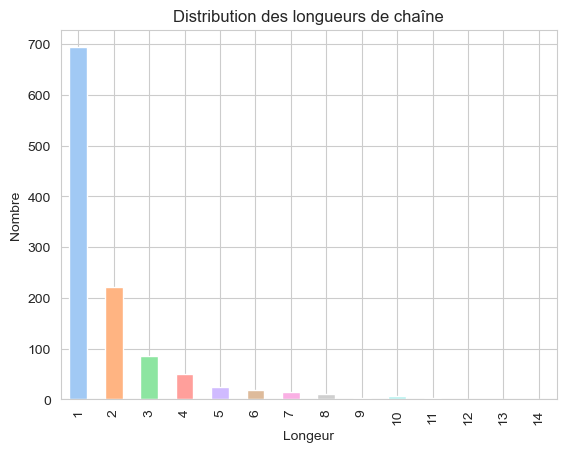

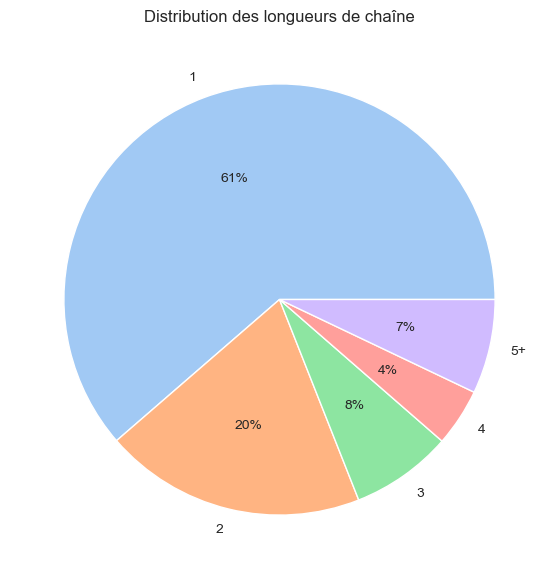

In [117]:
pieCut=4
dfDistLong=pd.DataFrame.from_dict(lChaines,orient="index").sort_index().iloc[0:]
dfDistLong.name="Longueur de chaine"
dfDistLong.plot.bar(y=0,color=colors,ylabel="Nombre",xlabel="Longeur",title="Distribution des longueurs de chaîne",legend=False)
plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong[:pieCut].copy()
autres=dfDistLong[pieCut:].sum()
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, autopct='%.0f%%',title="Distribution des longueurs de chaîne",figsize=(7,7),legend=False)
ax.set_ylabel(None)
dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

#### Nombre de chaines par longueur par référent

In [9]:
refChaines={}
lRefChaines={}#
# print(lRefChaines)
for k,v in chaines.items():
    ref=chaines[k]["ref"]
    chaine=chaines[k]["chaine"]
    if ref not in refChaines:
        refChaines[ref]=[]
        lRefChaines[ref]={i:0 for i in range(1,maxLChaines+1)}
    refChaines[ref].append(chaines[k]["chaine"])
    longueur=max(chaines[k]["chaine"].keys())
    if longueur not in lRefChaines[ref]:
        lRefChaines[ref][longueur]=0
    lRefChaines[ref][longueur]+=1
dfRefChaines=pd.DataFrame.from_dict(lRefChaines).sort_index().T

dfRefChaines["sum"]=dfRefChaines.iloc[:,0:maxLChaines].sum(axis=1)
dfRefChaines=dfRefChaines.sort_values(by='sum',ascending=False)
dfRefChaines=dfRefChaines.drop(columns="sum")
display(dfRefChaines.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
GTF,100,48,16,4,5,2,2,5,0,0,0,0,0,0
GTNZ,77,22,13,3,3,3,3,0,1,0,0,0,0,0
CHRISTIAN,45,0,2,4,2,0,0,0,0,0,0,0,0,0
Bernard,40,5,1,1,1,0,1,0,0,0,0,0,0,0
Christian,33,4,0,1,2,0,0,0,0,0,0,0,0,0


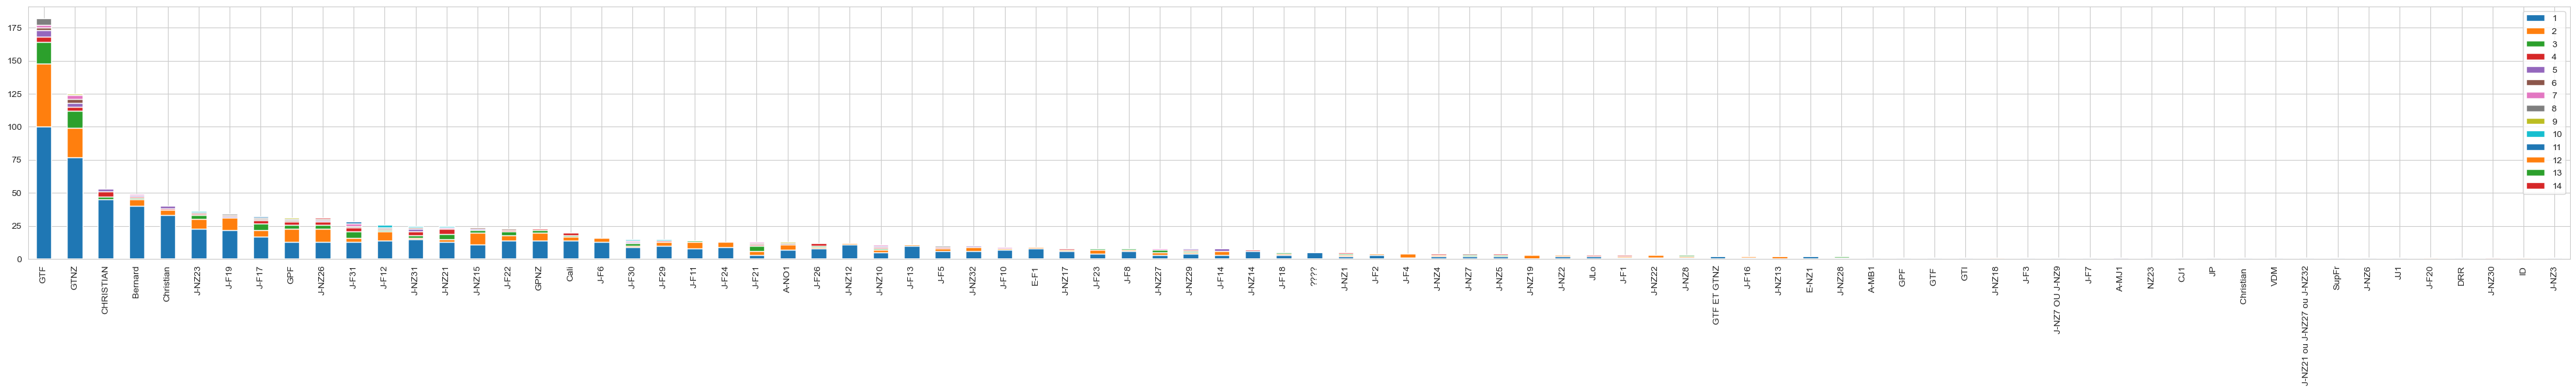

In [10]:
dfRefChaines.plot(kind="bar",stacked=True,figsize=(50,5))
plt.savefig("JE-SB-DistChaines-%s.pdf"%match)

#### Calcul du nombre de reprises par catégorie
- chaineIndex renseignée
- chaineDep différent de root (≠0)

In [11]:
print(match)
catTable=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby("Cat").count()[["Lemme"]].loc["NAM PRO:REL PRO:PER NOM DET:POS PRO:DEM PRO:IND".split(" ")]
display(catTable)
print(catTable.sum())

FrNz


,Lemme
Cat,
NAM,67
PRO:REL,157
PRO:PER,595
NOM,81
DET:POS,14
PRO:DEM,14
PRO:IND,1


Lemme    929
dtype: int64


#### Détail des reprises

In [12]:
dfGroupReprises=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].sum()
dfGroupReprises

Cat Transcription
numChaine chaineIndex                          
1.0       2.0             PRO:DEM          ceux
5.0       2.0             PRO:PER           ils
          3.0          PRO:DEMNOM   cetteéquipe
9.0       2.0             PRO:REL           qui
19.0      2.0                 NOM     capitaine
...                           ...           ...
1147.0    4.0             PRO:PER            je
          5.0             PRO:PER            je
          6.0             PRO:PER            je
          7.0                 NOM          Titi
1149.0    2.0             PRO:PER          nous

[865 rows x 2 columns]

In [13]:
print(match,len(dfGroupReprises),nbMots,"%2.1f%%"%(len(dfGroupReprises)/nbMots*100))

FrNz 865 18211 4.7%


#### Détail des références

In [14]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents

Cat  \
numChaine chaineIndex                                    
1.0       1.0                                  PRO:DEM   
          2.0                                  PRO:DEM   
2.0       1.0                                      NAM   
3.0       1.0                                      NAM   
4.0       1.0          DET:ART NOM PRP:det NOM PRP NOM   
...                                                ...   
1147.0    8.0              NOM PRP DET:ART NOM PRP NAM   
1148.0    1.0                                      NAM   
1149.0    1.0                      DET:ART NOM PRP NAM   
          2.0                                  PRO:PER   
1150.0    1.0                                      NAM   

                                          Transcription  
numChaine chaineIndex                                    
1.0       1.0                                      ceux  
          2.0                                      ceux  
2.0       1.0                                   Bernard  
3.0       1.0                                 Christian  
4.0       1.0           les champions du monde en titre  
...                                                 ...  
1147.0    8.0          capitaine de l' équipe de France  
1148.0    1.0                                   Bernard  
1149.0    1.0                       l' équipe de France  
          2.0                                      nous  
1150.0    1.0                                   Bernard  

[2050 rows x 2 columns]

In [15]:
print(match,len(dfGroupeReferents),nbMots,"%2.1f%%"%(len(dfGroupeReferents)/nbMots*100))

FrNz 2050 18211 11.3%


In [16]:
print(dfGroupeReferents.to_string())

                                                                   Cat                               Transcription
numChaine chaineIndex                                                                                             
1.0       1.0                                                  PRO:DEM                                        ceux
          2.0                                                  PRO:DEM                                        ceux
2.0       1.0                                                      NAM                                     Bernard
3.0       1.0                                                      NAM                                   Christian
4.0       1.0                          DET:ART NOM PRP:det NOM PRP NOM             les champions du monde en titre
5.0       1.0                          DET:ART NOM PRP:det NOM PRP NOM             les champions du monde en titre
          2.0                                                  PRO:PER          

### Stats par speaker

In [17]:
chainesSpk={}
spkChaines={}
for num in range(maxNumChaine):
    n=num+1
    dfChaine=df.loc[df.numChaine==n]
    # display(dfChaine)
    try:
        chainesSpk[n]={"spk":dfChaine.speaker.values[0],
                       "ref":dfChaine.Referent.values[0],
                       "chaine":{}}
        indexMax=int(dfChaine.chaineIndex.max())
        # print(indexMax)
        if indexMax not in spkChaines:
            spkChaines[indexMax]=0
        spkChaines[indexMax]+=1
        for ind in range(indexMax):
            i=ind+1
            dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
            # display(dfIndex)
            chainesSpk[n]["chaine"][i]=dfIndex[["Cat","Transcription"]].to_dict()
    except:
        print("pb",n,end=", ")
        # display(dfChaine)
print()
# print(chainesSpk)

pb 40, pb 104, pb 106, pb 142, pb 167, pb 179, pb 210, pb 226, pb 231, pb 247, pb 280, pb 293, pb 303, pb 533, pb 579, pb 748, pb 754, pb 1083, pb 1099, 


#### longueur de chaines par speaker

In [49]:
spkLen={"spk1":{n+1:0 for n in range(14)},"spk2":{n+1:0 for n in range(14)}}

for k,v in chainesSpk.items():
    if v['spk']==v['spk']:
        spks=v['spk'].split(" ")
        for spk in spks:
            lK=len(v["chaine"])
            if spk not in spkLen:
                spkLen[spk]={}
            if lK not in spkLen[spk]:
                spkLen[spk][lK]=0
            spkLen[spk][lK]+=1

##### Nombre de chaines par longueur

In [58]:
dfDistLong=pd.DataFrame.from_dict(spkLen,orient="index").sort_index().T[["spk1","spk2"]]

<Axes: title={'center': 'Distribution des longueurs de chaîne'}, xlabel='Longeur', ylabel='Nombre'>

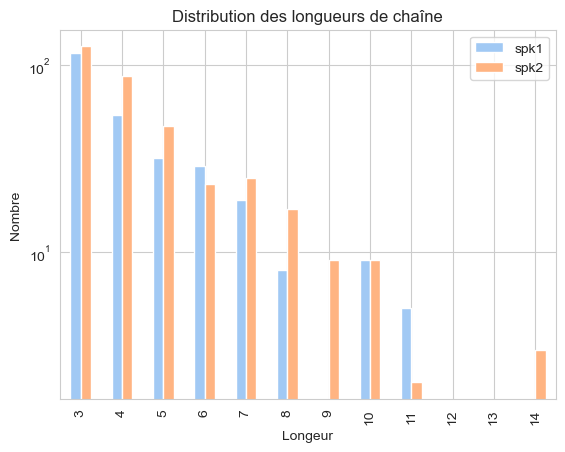

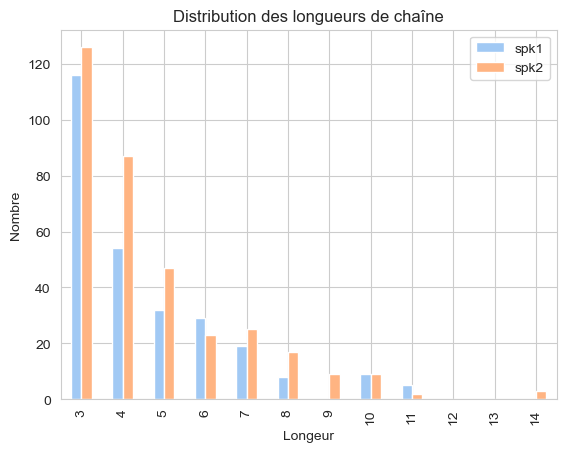

In [119]:
dfDistLongBar=pd.DataFrame.from_dict(spkLen,orient="index").sort_index().T.iloc[2:]
dfDistLongBar.name="Longueur de chaine"
dfDistLongBar.plot.bar(y=["spk1","spk2"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=True,
                    title="Distribution des longueurs de chaîne",legend=True)
dfDistLongBar.plot.bar(y=["spk1","spk2"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=False,
                    title="Distribution des longueurs de chaîne",legend=True)

1    442.0
2    120.0
3     41.0
4     21.0
Name: spk1, dtype: float64

spk1    37.0
dtype: float64

Text(0, 0.5, '')

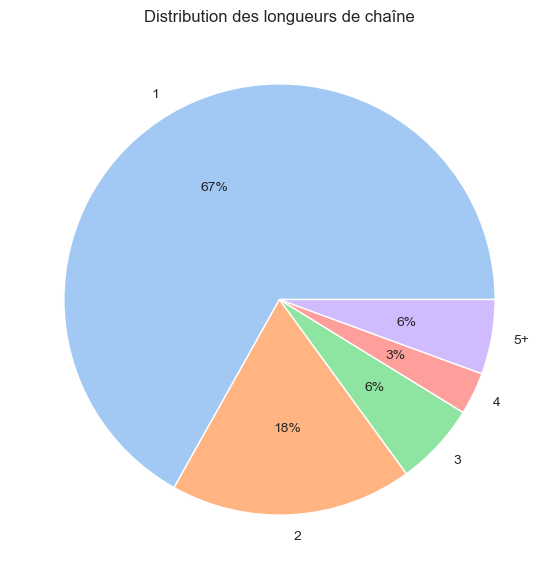

In [73]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
pieCut=4
dfTemp=dfDistLong["spk1"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["spk1"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

1    258.0
2    101.0
3     45.0
4     32.0
Name: spk2, dtype: float64

spk2    48.0
dtype: float64

Text(0, 0.5, '')

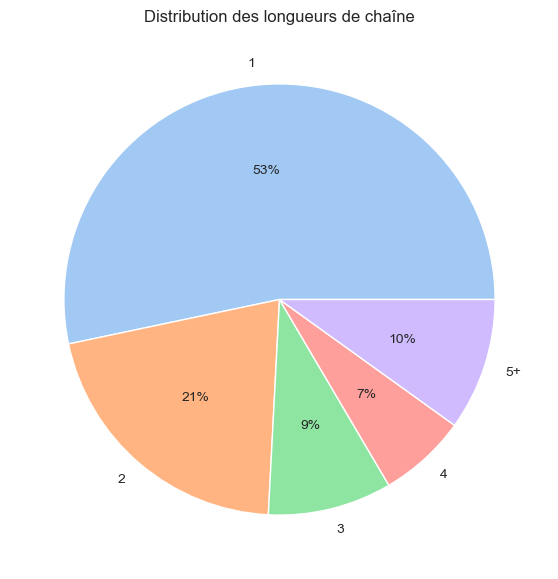

In [74]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong["spk2"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["spk2"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [91]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["speaker","numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents.loc[("spk1",slice(None)),:]
# dfGroupeReferents.loc[dfGroupeReferents.index.get_level_values(0).isin(["spk1","spk2"])]

Cat  \
speaker numChaine chaineIndex                                    
spk1    1.0       1.0                                  PRO:DEM   
                  2.0                                  PRO:DEM   
        2.0       1.0                                      NAM   
        4.0       1.0          DET:ART NOM PRP:det NOM PRP NOM   
        6.0       1.0                      DET:ART NOM PRP NAM   
...                                                        ...   
        1147.0    8.0              NOM PRP DET:ART NOM PRP NAM   
        1148.0    1.0                                      NAM   
        1149.0    1.0                      DET:ART NOM PRP NAM   
                  2.0                                  PRO:PER   
        1150.0    1.0                                      NAM   

                                                  Transcription  
speaker numChaine chaineIndex                                    
spk1    1.0       1.0                                      ceux  
                  2.0                                      ceux  
        2.0       1.0                                   Bernard  
        4.0       1.0           les champions du monde en titre  
        6.0       1.0                       l' équipe de France  
...                                                         ...  
        1147.0    8.0          capitaine de l' équipe de France  
        1148.0    1.0                                   Bernard  
        1149.0    1.0                       l' équipe de France  
                  2.0                                      nous  
        1150.0    1.0                                   Bernard  

[851 rows x 2 columns]

In [93]:
df.head()

,Transcription,Cat,Lemme,Referent,numChaine,chaineIndex,chaineDep,chaineApp,nPhrase,tour,type,tDeb,tFin,speaker
0,bonsoir,INT,bonsoir,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
1,",",PUN,",",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,c',PRO:DEM,ce,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
3,était,VER:impf,être,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
4,ceux,PRO:DEM,celui,GTF,1.0,1.0,0.0,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1


In [98]:
dfSpkCat=df[(df.chaineIndex.notnull())].groupby(["speaker","Cat"])[["Referent"]].count()
dfSpkCat.loc[dfSpkCat.index.get_level_values(0).isin(["spk1","spk2"])]

Referent
speaker Cat               
spk1    ADJ             32
        ADV              9
        DET:ART         90
        DET:POS          8
        KON              0
        NAM            614
        NOM            222
        NUM             11
        PRO              1
        PRO:DEM         10
        PRO:IND          1
        PRO:PER        184
        PRO:REL         56
        PRP             43
        PRP:det         15
        VER:infi         3
        VER:pper         5
        VER:pres         0
        VER:simp         3
spk2    ADJ             31
        ADV              1
        DET:ART         47
        DET:POS          8
        INT              1
        KON              0
        NAM            290
        NOM            122
        NUM             16
        PRO              2
        PRO:DEM         10
        PRO:IND          1
        PRO:PER        432
        PRO:REL         65
        PRP             19
        PRP:det          7
        VER:pper         5
        VER:pres         1
        VER:simp         3

In [102]:
df

,Transcription,Cat,Lemme,Referent,numChaine,chaineIndex,chaineDep,chaineApp,nPhrase,tour,type,tDeb,tFin,speaker
0,bonsoir,INT,bonsoir,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
1,",",PUN,",",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,c',PRO:DEM,ce,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
3,était,VER:impf,être,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
4,ceux,PRO:DEM,celui,GTF,1.0,1.0,0.0,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21937,suite,NOM,suite,NaN,NaN,NaN,NaN,NaN,2104,2446-spk1,Color commentary,01:48:08.686000,01:48:22.273000,spk1
21938,Denis,NAM,Denis,NaN,NaN,NaN,NaN,NaN,2104,2446-spk1,Color commentary,01:48:08.686000,01:48:22.273000,spk1
21939,à,PRP,à,NaN,NaN,NaN,NaN,NaN,2104,2446-spk1,Color commentary,01:48:08.686000,01:48:22.273000,spk1
21940,Paris,NAM,Paris,NaN,NaN,NaN,NaN,NaN,2104,2446-spk1,Color commentary,01:48:08.686000,01:48:22.273000,spk1


### Stats par période

In [101]:
chainesPer={}
perChaines={}
for num in range(maxNumChaine):
    n=num+1
    dfChaine=df.loc[df.numChaine==n]
    # display(dfChaine)
    try:
        chainesPer[n]={"spk":dfChaine.speaker.values[0],
                       "ref":dfChaine.Referent.values[0],
                       "type":dfChaine.type.values[0],
                       "chaine":{}}
        indexMax=int(dfChaine.chaineIndex.max())
        # print(indexMax)
        if indexMax not in perChaines:
            perChaines[indexMax]=0
        perChaines[indexMax]+=1
        for ind in range(indexMax):
            i=ind+1
            dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
            # display(dfIndex)
            chainesPer[n]["chaine"][i]=dfIndex[["Cat","Transcription"]].to_dict()
    except:
        print("pb",n,end=", ")
        # display(dfChaine)
print()
# print(chainesSpk)

pb 40, pb 104, pb 106, pb 142, pb 167, pb 179, pb 210, pb 226, pb 231, pb 247, pb 280, pb 293, pb 303, pb 533, pb 579, pb 748, pb 754, pb 1083, pb 1099, 


#### longueur de chaines par speaker

In [105]:
perLen={"Color commentary":{n+1:0 for n in range(14)},"Play by play":{n+1:0 for n in range(14)}}

for k,v in chainesPer.items():
    if v['type']==v['type']:
        per=v['type']
        lK=len(v["chaine"])
        if per not in perLen:
            perLen[per]={}
        if lK not in perLen[per]:
            perLen[per][lK]=0
        perLen[per][lK]+=1

In [106]:
perLen

{'Color commentary': {1: 410,
  2: 136,
  3: 44,
  4: 26,
  5: 17,
  6: 11,
  7: 8,
  8: 8,
  9: 2,
  10: 6,
  11: 1,
  12: 0,
  13: 0,
  14: 1},
 'Play by play': {1: 217,
  2: 68,
  3: 37,
  4: 18,
  5: 7,
  6: 5,
  7: 6,
  8: 2,
  9: 1,
  10: 1,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 'Autre': {1: 57, 3: 5, 2: 17, 6: 2, 4: 5, 11: 1, 5: 1}}

##### Nombre de chaines par longueur

In [175]:
dfDistLong=pd.DataFrame.from_dict(perLen,orient="index").sort_index().T

In [176]:
dfDistLong

,Autre,Color commentary,Play by play
1,57.0,410.0,217.0
2,17.0,136.0,68.0
3,5.0,44.0,37.0
4,5.0,26.0,18.0
5,1.0,17.0,7.0
6,2.0,11.0,5.0
7,NaN,8.0,6.0
8,NaN,8.0,2.0
9,NaN,2.0,1.0
10,NaN,6.0,1.0


<Axes: title={'center': 'Distribution des longueurs de chaîne'}, xlabel='Longeur', ylabel='Nombre'>

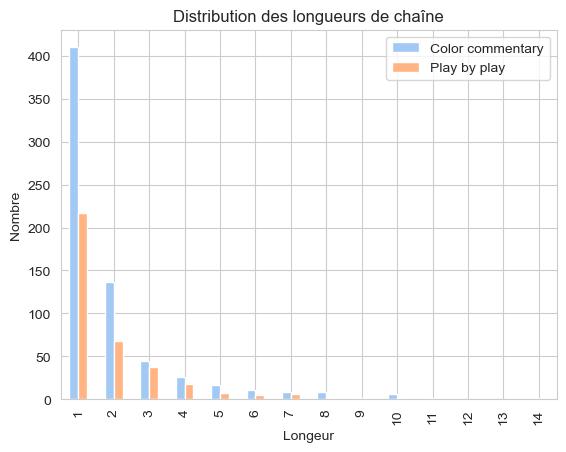

In [120]:
dfDistLongBar=pd.DataFrame.from_dict(perLen,orient="index").sort_index().T.iloc[0:]
dfDistLongBar.name="Longueur de chaine"
# dfDistLongBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
#                     ylabel="Nombre",xlabel="Longeur",logy=True,
#                     title="Distribution des longueurs de chaîne",legend=True)
dfDistLongBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=False,
                    title="Distribution des longueurs de chaîne",legend=True)

1    410.0
2    136.0
3     44.0
4     26.0
Name: Color commentary, dtype: float64

Color commentary    54.0
dtype: float64

Text(0, 0.5, '')

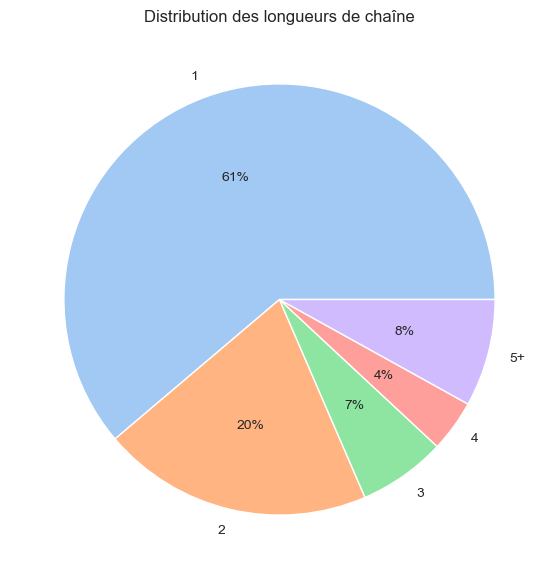

In [110]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
pieCut=4
dfTemp=dfDistLong["Color commentary"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["Color commentary"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

1    217.0
2     68.0
3     37.0
4     18.0
Name: Play by play, dtype: float64

Play by play    22.0
dtype: float64

Text(0, 0.5, '')

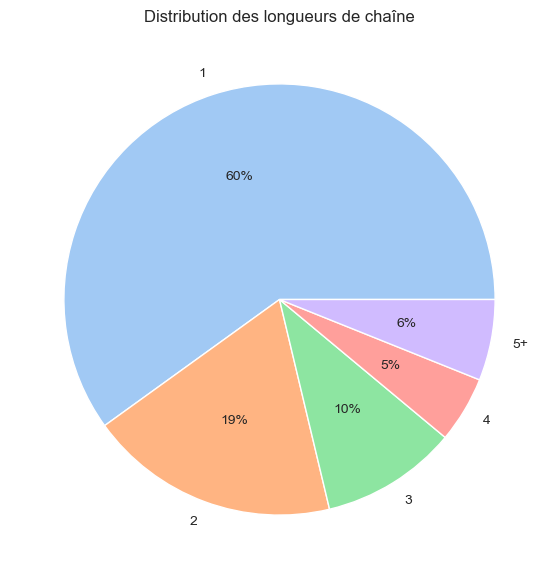

In [111]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong["Play by play"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["Play by play"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [112]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["type","numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents.loc[("Play by play",slice(None)),:]
# dfGroupeReferents.loc[dfGroupeReferents.index.get_level_values(0).isin(["spk1","spk2"])]

Cat     Transcription
type         numChaine chaineIndex                               
Play by play 113.0     1.0          NOM PRP NAM  équipe de France
             114.0     1.0              NAM NAM    Bernard Leroux
             116.0     1.0              NAM NAM     Yohan Maestri
             118.0     1.0                  NOM         Whitelock
             119.0     1.0              NAM NAM       Kieran Read
...                                         ...               ...
             1087.0    3.0                  NAM              Nonu
                       4.0              PRO:PER                il
                       5.0              PRO:PER                il
                       6.0              PRO:PER                il
             1088.0    1.0              PRO:PER              nous

[579 rows x 2 columns]

In [93]:
df.head()

,Transcription,Cat,Lemme,Referent,numChaine,chaineIndex,chaineDep,chaineApp,nPhrase,tour,type,tDeb,tFin,speaker
0,bonsoir,INT,bonsoir,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
1,",",PUN,",",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,c',PRO:DEM,ce,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
3,était,VER:impf,être,NaN,NaN,NaN,NaN,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1
4,ceux,PRO:DEM,celui,GTF,1.0,1.0,0.0,NaN,0,1-spk1,Color commentary,00:00:36.628000,00:00:40.304000,spk1


In [167]:
dfSpkCat=df[(df.chaineIndex.notnull())].groupby(["type","Cat"])[["Referent"]].count()
dfSpkCatDist=dfSpkCat.loc[dfSpkCat.index.get_level_values(0).isin(["Color commentary","Play by play"])]

In [168]:
dfSpkCatDist.loc[dfSpkCatDist.Referent>100]
dfSpkCatDistCut=dfSpkCatDist.loc[dfSpkCatDist.index.get_level_values(1).isin(["NAM",
                                                              "NOM",
                                                              "PRO:PER",
                                                              "PRO:REL"])]
autres=dfSpkCatDist.loc[~dfSpkCatDist.index.get_level_values(1).isin(["NAM",
                                                              "NOM",
                                                              "PRO:PER",
                                                              "PRO:REL"])]

In [169]:
autresPlay=autres.loc[("Play by play",slice(None)),:].sum()
dfSpkCatDistCut.loc[("Play by play","Autres"),:]=autresPlay
autresColor=autres.loc[("Color commentary",slice(None)),:].sum()
dfSpkCatDistCut.loc[("Color commentary","Autres"),:]=autresColor


/var/folders/dy/h2nycthd7qjbd6qkb5h8t0nm0000gn/T/ipykernel_1389/1131610428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSpkCatDistCut.loc[("Play by play","Autres"),:]=autresPlay


In [203]:
dfSpkCatDistBar=dfSpkCatDistCut.reset_index().pivot(index="Cat",columns="type",values="Referent")
dfSpkCatDistBar.sort_values("Color commentary",ascending=False,inplace=True)
xlabels=dfSpkCatDistBar.index.to_list()
xpop=xlabels.index("Autres")
xlabels.pop(xpop)
dfSpkCatDistBar=dfSpkCatDistBar.reindex(xlabels+["Autres"])


<Axes: title={'center': 'Distribution des premiers éléments de chaîne'}, xlabel='Catégorie', ylabel='Nombre'>

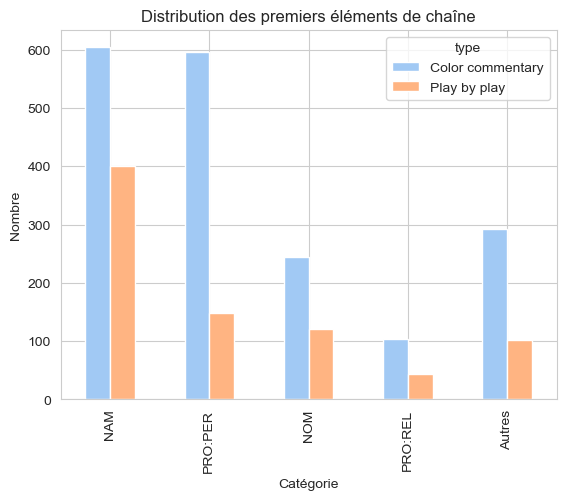

In [204]:
dfSpkCatDistBar.name="Premier élément"
# dfDistLongBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
#                     ylabel="Nombre",xlabel="Longeur",logy=True,
#                     title="Distribution des longueurs de chaîne",legend=True)
dfSpkCatDistBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
                    ylabel="Nombre",xlabel="Catégorie",logy=False,
                    title="Distribution des premiers éléments de chaîne",legend=True)